In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import pandas as pd

In [ ]:
np.__version__

In [2]:
#data file
ds = xr.open_dataset('/Users/marki/Downloads/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_allsky_clearsky.nc')

In [3]:
#Cloud Froaction from 60N to 60S
cldarea_total_mon=ds['cldarea_total_mon'][ : ,30:150, :]
cldarea_total_mon

<xarray.DataArray 'cldarea_total_mon' (time: 234, lat: 120, lon: 360)>
[10108800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2021-12-15
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
Attributes:
    long_name:      Cloud Parameters: Cloud Area Fraction, Total clouds, Mont...
    standard_name:  Cloud Area Fraction - Total clouds
    units:          percent
    valid_min:             0
    valid_max:           100

In [4]:
#Cloud fraction in 1D np.ravel
cf=np.ravel(cldarea_total_mon)
cf

array([79.07597 , 79.07597 , 79.28124 , ..., 86.62028 , 90.134605,
       90.134605], dtype=float32)

In [5]:
#Cloud Fraction in actual fraction
c_f=cf/100
c_f

array([0.79075974, 0.79075974, 0.7928124 , ..., 0.8662028 , 0.901346  ,
       0.901346  ], dtype=float32)

In [ ]:
any(np.isnan(c_f))


In [ ]:
np.shape(c_f)

In [6]:
# Shortwave (SW) energy leaving the Earth system
toa_sw_all_mon=ds['toa_sw_all_mon'][ : ,30:150, :]
toa_sw_all_mon

<xarray.DataArray 'toa_sw_all_mon' (time: 234, lat: 120, lon: 360)>
[10108800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2021-12-15
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
Attributes:
    long_name:      Observed Top of the Atmosphere Shortwave Flux, All-sky co...
    standard_name:  Observed TOA Shortwave Flux - All-sky
    units:          W m-2
    valid_min:             0
    valid_max:          1450

In [7]:
#SW leaving Earth in 1D np.ravel
sw_leave=np.ravel(toa_sw_all_mon)
sw_leave

array([23.31924 , 23.31924 , 22.907372, ..., 14.977612, 15.855193,
       15.855193], dtype=float32)

In [8]:
# Shortwave (SW) incoming from the sun
toa_solar_all_mon=ds['toa_solar_all_mon'][ : ,30:150, :]
toa_solar_all_mon

<xarray.DataArray 'toa_solar_all_mon' (time: 234, lat: 120, lon: 360)>
[10108800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2021-12-15
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
Attributes:
    long_name:      Observed Top of the Atmosphere Solar Insolation Flux, All...
    standard_name:  Observed TOA Solar Insolation Flux - All-sky
    units:          W m-2
    valid_min:             0
    valid_max:          1450

In [9]:
#SW Incoming from the Sun in 1D np.ravel
sw_income=np.ravel(toa_solar_all_mon)
sw_income

array([38.95842 , 38.95842 , 38.95277 , ..., 29.430557, 29.431767,
       29.431767], dtype=float32)

In [10]:
# Scene albedo is defined as the shortwave (SW) energy leaving the Earth system divided by the SW incoming from the sun
Scene_albedo= np.divide(sw_leave,sw_income)
Scene_albedo

array([0.5985674 , 0.5985674 , 0.5880807 , ..., 0.50891364, 0.53871024,
       0.53871024], dtype=float32)

In [ ]:
#valid = np.logical_and(~np.isnan(c_f),~np.isnan(Scene_albedo))
#print(valid)
#d = np.logical_and(~np.isnan(Scene),~np.isnan(Scene_albedo))

In [ ]:
#valid1= valid[np.logical_not(np.isnan(valid))]
#print(valid1)

In [ ]:
#np.shape(c_f)


In [ ]:
#np.shape(Scene_albedo)

In [ ]:
#Identifying and removing NaN values for Scene Albedo?
#SA_NaN=Scene_albedo[np.logical_not(np.isnan(Scene_albedo))]
#SA=Scene_albedo[~np.isnan(Scene_albedo)]
#print(SA_NaN)
#print(SA)

In [ ]:
#np.shape(SA_NaN)

In [ ]:
#identifying and removing NaN values for Cloud Fraction
#CF_NaN=c_f[np.logical_not(np.isnan(c_f))]
#CF=c_f[~np.isnan(c_f)]
#print(CF_NaN)
#print(CF)

In [ ]:
#np.shape(CF_NaN)

In [ ]:
#valid = np.logical_and(~np.isnan(CF_NaN),~np.isnan(SA_NaN))

In [12]:
NaN=np.logical_or(np.isnan(c_f,),np.isnan(Scene_albedo))
NaN

array([False, False, False, ..., False, False, False])

In [14]:
CF_NaN=c_f[NaN]
SA_Nan=Scene_albedo[NaN]

In [22]:
x=np.log(CF_NaN)

In [17]:
SA_Nan

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [ ]:
CF

In [ ]:
np.size(CF)

In [ ]:
np.shape(CF)

In [ ]:
np.ndim(CF)

In [ ]:
SA

In [ ]:
np.size(SA)

In [ ]:
np.shape(SA)

In [ ]:
np.ndim(SA)

C:\Users\marki\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: operands could not be broadcast together with shapes (10101662,) (10100786,) 

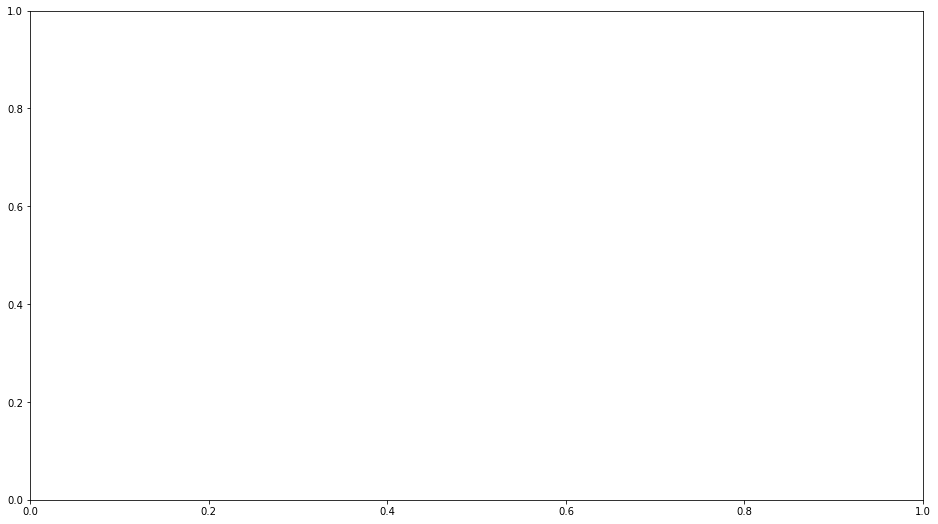

In [27]:
plt.figure(figsize=(16,9))
plt.hist2d(CF_NaN, SA_NaN)
#plt.title('Cloud Fraction vs. Albedo')
#plt.xlabel('Cloud Fraction')
#plt.ylabel('Albedo (%)')
cbar=plt.colorbar()
#cbar.set label('Counts')

In [23]:
#Identifying and removing NaN values for Scene Albedo?
SA_NaN=Scene_albedo[np.logical_not(np.isnan(Scene_albedo))]
SA=Scene_albedo[~np.isnan(Scene_albedo)]
print(SA_NaN)
print(SA)
#identifying and removing NaN values for Cloud Fraction
CF_NaN=c_f[np.logical_not(np.isnan(c_f))]
CF=c_f[~np.isnan(c_f)]
print(CF_NaN)
print(CF)
valid = ~np.logical_or(np.isnan(CF),np.isnan(SA))
valid = ~np.logical_or(np.isnan(SA),np.isnan(CF))

[0.5985674  0.5985674  0.5880807  ... 0.50891364 0.53871024 0.53871024]
[0.5985674  0.5985674  0.5880807  ... 0.50891364 0.53871024 0.53871024]
[0.79075974 0.79075974 0.7928124  ... 0.8662028  0.901346   0.901346  ]
[0.79075974 0.79075974 0.7928124  ... 0.8662028  0.901346   0.901346  ]


ValueError: operands could not be broadcast together with shapes (10101662,) (10100786,) 